# Convert lung surface to point cloud type: list of cooridanates

In [6]:
from glob import glob
from tqdm import tqdm
from medutils.medutils import load_itk, save_itk
from multiprocessing import Pool, Queue, Process, Value, Array, Manager, Lock
from glob import glob
from skimage.morphology import skeletonize_3d
import itk
import SimpleITK as sitk
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch
import os

In [2]:
lung_mask_ls = glob('/home/jjia/data/dataset/lung_function/iso1.5/SSc_patient_*_LungMask.nii.gz')


In [12]:
lung_mask_ls[:2]

['/home/jjia/data/dataset/lung_function/iso1.5/SSc_patient_1066422_LungMask.nii.gz',
 '/home/jjia/data/dataset/lung_function/iso1.5/SSc_patient_7325831_LungMask.nii.gz']

In [56]:
for skeleton_fpath in tqdm(lung_mask_ls):
    # if not os.path.exists(skeleton_fpath.replace('.nii.gz', '_coordinates.pt')):
        # print('loading {skeleton_fpath}')
    skeleton, ori, sp = load_itk(skeleton_fpath, require_ori_sp=True)
    x,y,z = skeleton.shape
    xs, ys, zs = np.mgrid[:x, :y, :z]
    out = np.column_stack((xs.ravel(),ys.ravel(),zs.ravel(), skeleton.ravel()))
    out2= out[out[:, -1]>0]
    out_dt = {'data': out2, 'origin':ori, 'spacing':sp}
    pickle.dump(out_dt, open(skeleton_fpath.replace('.nii.gz', '_coordinates.pt'), "wb"))


100%|██████████| 317/317 [06:24<00:00,  1.21s/it]


In [57]:
len_ls = []
for skeleton_fpath in tqdm(lung_mask_ls):
    pth = skeleton_fpath.replace('.nii.gz', '_coordinates.pt')
    with open(pth, 'rb') as f:
        data_dt = pickle.load(f)
    a = len(data_dt['data'])
    # print(a)
    len_ls.append(a)



100%|██████████| 317/317 [00:12<00:00, 25.12it/s]


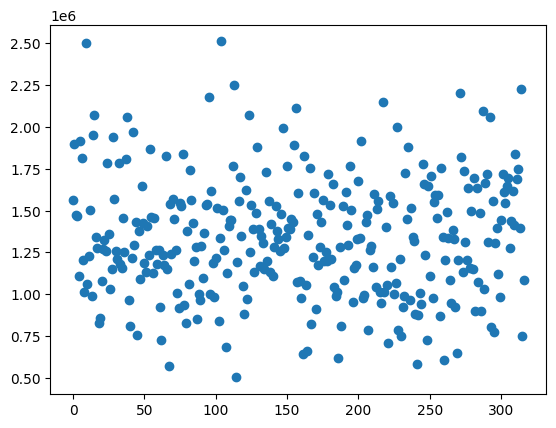

In [58]:
plt.figure()
plt.scatter(x=range(len(len_ls)), y=len_ls)
plt.show()  # 10000k

In [59]:
for skeleton_fpath in tqdm(lung_mask_ls[:1]):
    pth = skeleton_fpath.replace('.nii.gz', '_coordinates.pt')
    with open(pth, 'rb') as f:
        data_dt = pickle.load(f)
    a = len(data_dt['data'])
 



100%|██████████| 1/1 [00:00<00:00, 13.02it/s]


In [61]:
data_dt['data'][:, -1].min()

1